# Decision  Tree


In [1]:
#import libraries
import numpy as np
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

<div>
    <h2>About the dataset</h2>
    Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 
    <br>
    <br>
    Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.
    <br>
    <br>
    It is a sample of multiclass classifier, and you can use the training part of the dataset 
    to build a decision tree, and then use it to predict the class of an unknown patient, or to prescribe a drug to a new patient.
</div>


In [2]:
df =pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df.shape

(200, 6)

In [4]:
df['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

## Pre-processing

Using <b>df</b> as the Drug.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> response vector </b> (target) </li>
</ul>


In [25]:
x= df[['Age' ,'Sex','BP' ,'Cholesterol' ,'Na_to_K']].values
x[:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

As you may figure out, some features in this dataset are categorical, such as **Sex** or **BP**. Unfortunately, Sklearn Decision Trees does not handle categorical variables. We can still convert these features to numerical values using **pandas.get_dummies()**
to convert the categorical variable into dummy/indicator variables.


In [26]:
from sklearn.preprocessing import LabelEncoder as LE


In [27]:
print (df['Sex'].value_counts()  )

M    104
F     96
Name: Sex, dtype: int64


In [28]:
print( df['BP'].value_counts() )

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64


In [29]:
print( df['Cholesterol'].value_counts())

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64


In [30]:
l_sex =LE()
l_sex.fit(['F' ,'M'])
l_BP =LE()
l_BP.fit(['LOW' ,'NORMAL' ,'HIGH'])
l_ch =LE()
l_ch.fit(['NORMAL' , 'HIGH'])

LabelEncoder()

In [31]:
x[: , 1] = l_sex.transform(x[: , 1]) #sex
x[: , 2] = l_BP.transform(x[: , 2])
x[: , 3] = l_ch.transform(x[: , 3])
x[:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [66]:
y = df['Drug'].values
y[:5]

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY'], dtype=object)

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.


In [67]:
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train ,y_test = train_test_split(x,y,test_size =0.3 ,random_state =3)

In [68]:
print ('Train set size = ' ,x_train.shape , y_train.shape)

Train set size =  (140, 5) (140,)


In [69]:
print ('Test set size = ' ,x_test.shape , y_test.shape)

Test set size =  (60, 5) (60,)


<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>


In [89]:
drugTree = DecisionTreeClassifier(criterion='entropy' ,max_depth=4)

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>


In [90]:
drugTree.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Prediction

In [91]:
predTree = drugTree.predict(x_test)


You can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the predictions to the actual values.


In [92]:
print(y_test[0:5])
print(predTree [:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
['drugY' 'drugX' 'drugX' 'drugX' 'drugX']


## Evaluation

In [93]:
from sklearn import metrics
print("Accuracy of Decision Tree  = %f" % metrics.accuracy_score(y_test ,predTree))

Accuracy of Decision Tree  = 0.983333


## visualization

In [94]:
import matplotlib.pyplot as plt


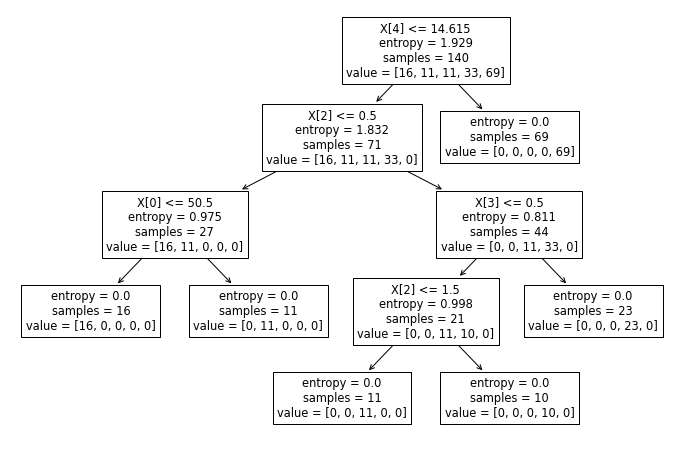

In [95]:
plt.figure(figsize=(12,8))
tree.plot_tree(drugTree)
plt.show()